# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [22]:
import pandas as pd
import os 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [23]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [24]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [4]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [5]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [6]:
df_new.isnull().sum()

electric_train.tm             0
electric_train.hh24           0
electric_train.weekday        0
electric_train.week_name      0
electric_train.sum_qctr       0
electric_train.n              0
electric_train.sum_load       0
electric_train.n_mean_load    0
electric_train.elec           0
electric_train.num            0
electric_train.stn            0
electric_train.nph_ta         0
electric_train.nph_hm         0
electric_train.nph_ws_10m     0
electric_train.nph_rn_60m     0
electric_train.nph_ta_chi     0
dtype: int64

In [7]:
df_new['year'] = df_new['electric_train.tm'].dt.year
df_new['month'] = df_new['electric_train.tm'].dt.month
df_new['day'] = df_new['electric_train.tm'].dt.day

In [8]:
df_new = df_new.sort_values(by='electric_train.tm')
df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,year,month,day
2647991,2020-01-01 01:00:00,1,2,0,63850,39,9732.96,250.490543,99.63,13615,140,-8.5,74.5,0.9,0.0,-5.8,2020,1,1
5208382,2020-01-01 01:00:00,1,2,0,14750,20,2401.12,116.010234,103.49,18235,565,-8.8,25.6,1.9,0.0,-4.6,2020,1,1
5182078,2020-01-01 01:00:00,1,2,0,71630,32,12139.16,363.252769,104.43,18234,565,-8.8,25.6,1.9,0.0,-4.6,2020,1,1
5155774,2020-01-01 01:00:00,1,2,0,45840,28,6723.84,225.924357,106.29,18233,512,-6.3,31.3,2.5,0.0,-7.8,2020,1,1
1280137,2020-01-01 01:00:00,1,2,0,76450,44,12949.24,287.250770,102.45,11272,941,2.4,68.0,1.2,0.0,-5.3,2020,1,1


In [9]:
# 시즌을 결정하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 'season' 컬럼 추가
df_new['season'] = df_new['electric_train.tm'].dt.month.apply(get_season)

In [10]:
df_new.columns

Index(['electric_train.tm', 'electric_train.hh24', 'electric_train.weekday',
       'electric_train.week_name', 'electric_train.sum_qctr',
       'electric_train.n', 'electric_train.sum_load',
       'electric_train.n_mean_load', 'electric_train.elec',
       'electric_train.num', 'electric_train.stn', 'electric_train.nph_ta',
       'electric_train.nph_hm', 'electric_train.nph_ws_10m',
       'electric_train.nph_rn_60m', 'electric_train.nph_ta_chi', 'year',
       'month', 'day', 'season'],
      dtype='object')

In [11]:
new_col_order = ['electric_train.tm', 'year', 'season', 'month','day', 'electric_train.weekday', 'electric_train.hh24',
       'electric_train.week_name', 'electric_train.sum_qctr',
       'electric_train.n', 'electric_train.sum_load',
       'electric_train.n_mean_load',
       'electric_train.num', 'electric_train.stn', 'electric_train.nph_ta',
       'electric_train.nph_hm', 'electric_train.nph_ws_10m',
       'electric_train.nph_rn_60m', 'electric_train.nph_ta_chi', 'electric_train.elec']

In [12]:
df_new = df_new[new_col_order]

In [13]:
df_new.head()

,electric_train.tm,year,season,month,day,electric_train.weekday,electric_train.hh24,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
2647991,2020-01-01 01:00:00,2020,Winter,1,1,2,1,0,63850,39,9732.96,250.490543,13615,140,-8.5,74.5,0.9,0.0,-5.8,99.63
5208382,2020-01-01 01:00:00,2020,Winter,1,1,2,1,0,14750,20,2401.12,116.010234,18235,565,-8.8,25.6,1.9,0.0,-4.6,103.49
5182078,2020-01-01 01:00:00,2020,Winter,1,1,2,1,0,71630,32,12139.16,363.252769,18234,565,-8.8,25.6,1.9,0.0,-4.6,104.43
5155774,2020-01-01 01:00:00,2020,Winter,1,1,2,1,0,45840,28,6723.84,225.924357,18233,512,-6.3,31.3,2.5,0.0,-7.8,106.29
1280137,2020-01-01 01:00:00,2020,Winter,1,1,2,1,0,76450,44,12949.24,287.250770,11272,941,2.4,68.0,1.2,0.0,-5.3,102.45


### 2.1. Target Distribution

Target에 해당하는 elec(전력기상지수)의 분포를 살펴보겠습니다.

평균(location), 표준편차(scale), 왜도(skewness)를 기준으로 살펴 보겠습니다.

In [14]:
spots_num = sorted(df_new['electric_train.num'].unique().tolist())
df_1 = df_new[df_new['electric_train.num']==spots_num[1]]
spots_num[:10]

[4821, 5565, 5566, 5567, 8994, 9609, 9735, 9736, 9758, 9759]

In [15]:
no_2020 = []
yes_2020 = []
for i in range(len(spots_num)):
    a = str(df_new[df_new['electric_train.num']==spots_num[i]]['electric_train.tm'].min())
    b = str(df_1['electric_train.tm'].min())

    if a != b:
        no_2020.append(spots_num[i])
    else:
        yes_2020.append(spots_num[i])
        
print(len(no_2020))  # 2020년도 데이터가 없는 격자 지역 개수 
print(len(yes_2020)) # 2020년도 데이터가 있는 격자 지역 개수

23
300


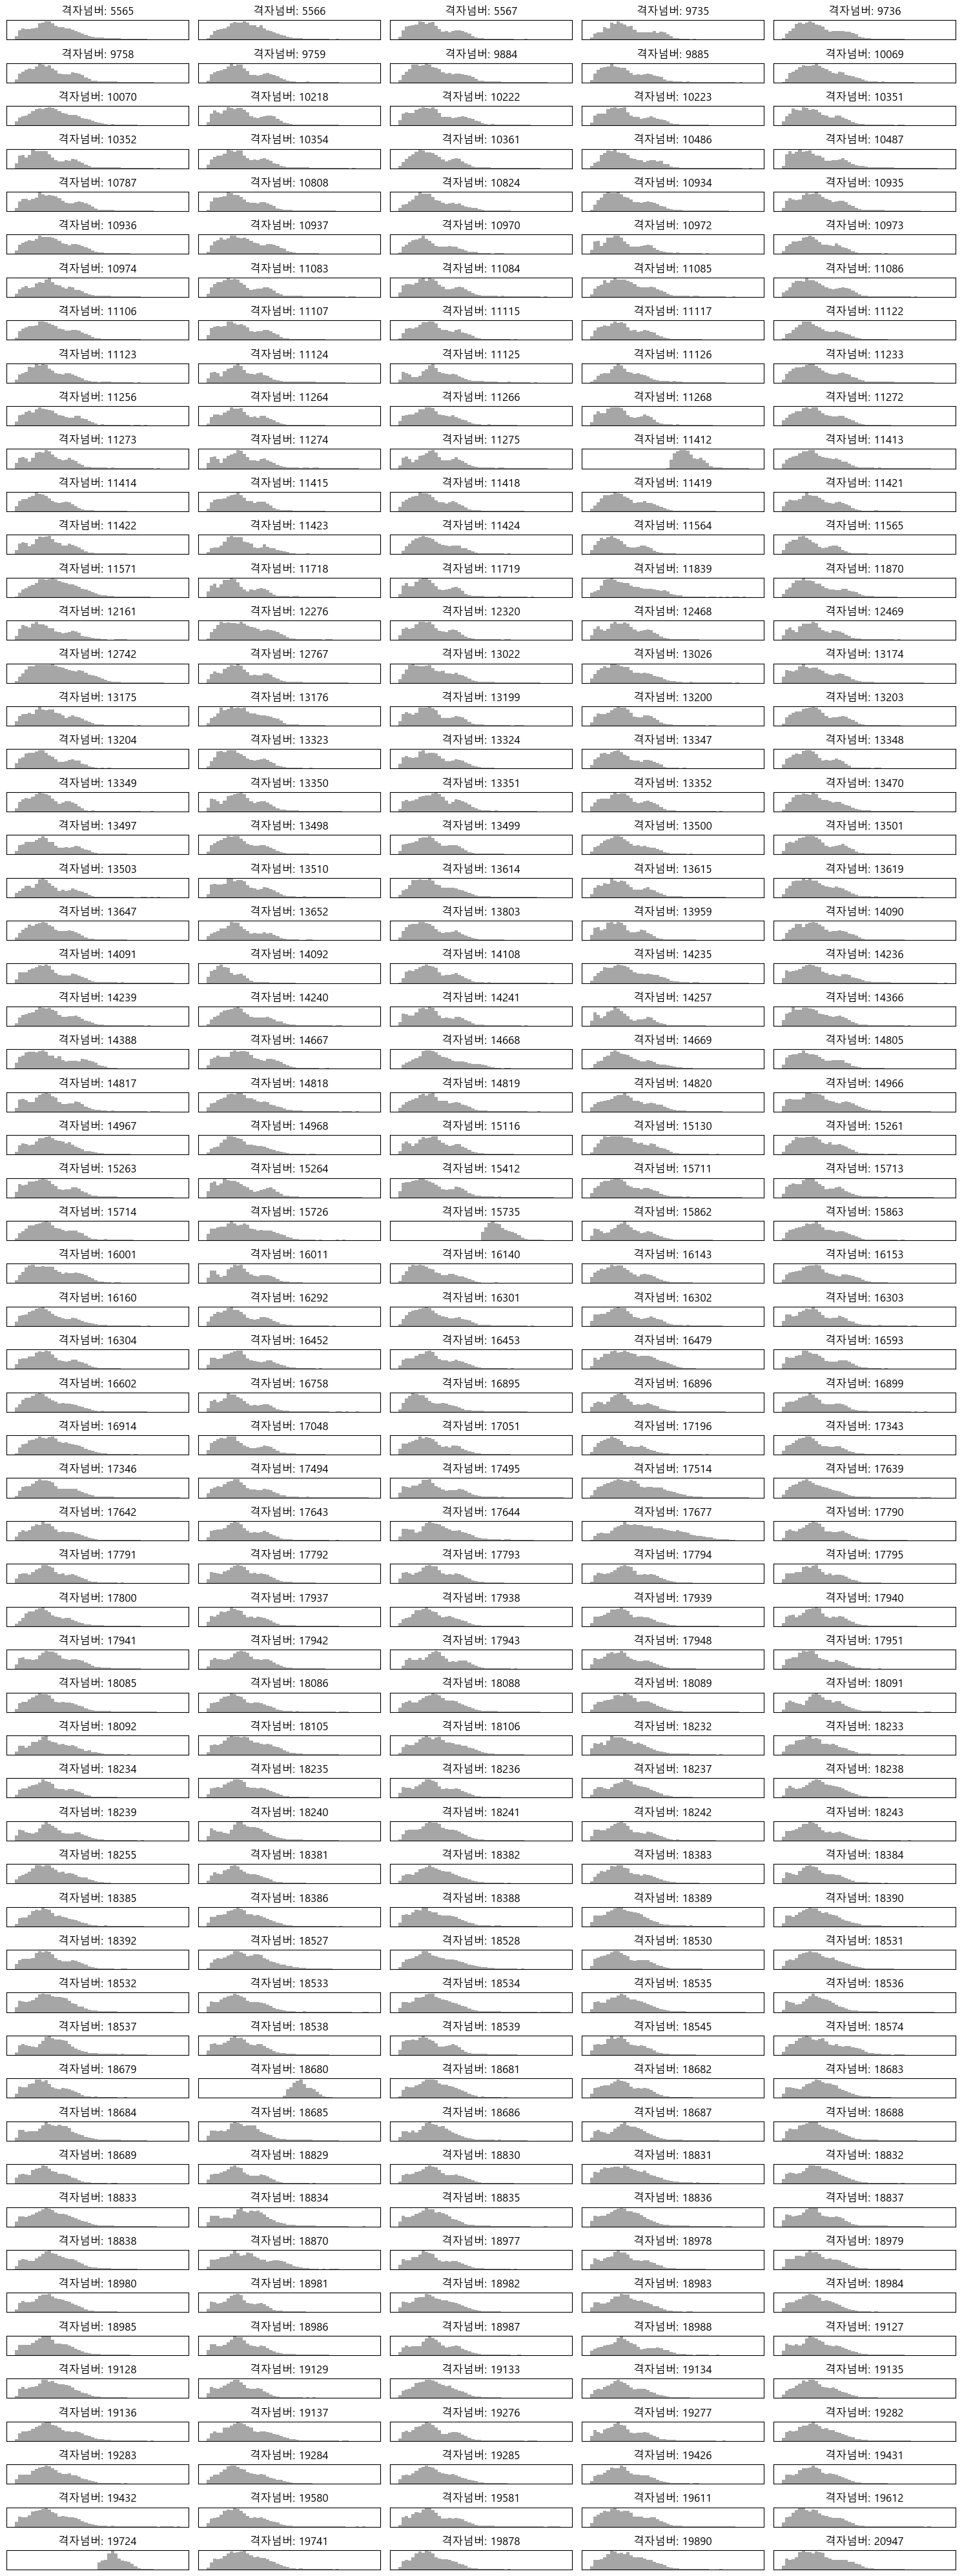

In [16]:
fig = plt.figure(figsize = (15, 40))
for num in range(len(yes_2020)):
    ax = plt.subplot(60, 5, 1+num)
    energy = df_new.loc[df_new['electric_train.num'] == yes_2020[num], 'electric_train.elec'].values
    mean = energy.mean().round(3)           # 평균
    std = energy.std().round(3)             # 편차
    skew = (3*(mean - np.median(energy))/energy.std()).round(3) # 왜도

    # 왜도에 따라 
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
        
    plt.title(f'격자넘버: {yes_2020[num]}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

### 2.2. energy usage of each building in relation to datetime

지금부터 datetime관련 변수(시간, 요일, 전체 timeline)에 따라 건물별로 전력사용량 패턴을 살펴보겠습니다.

Elec in relation to weekday and **hour**

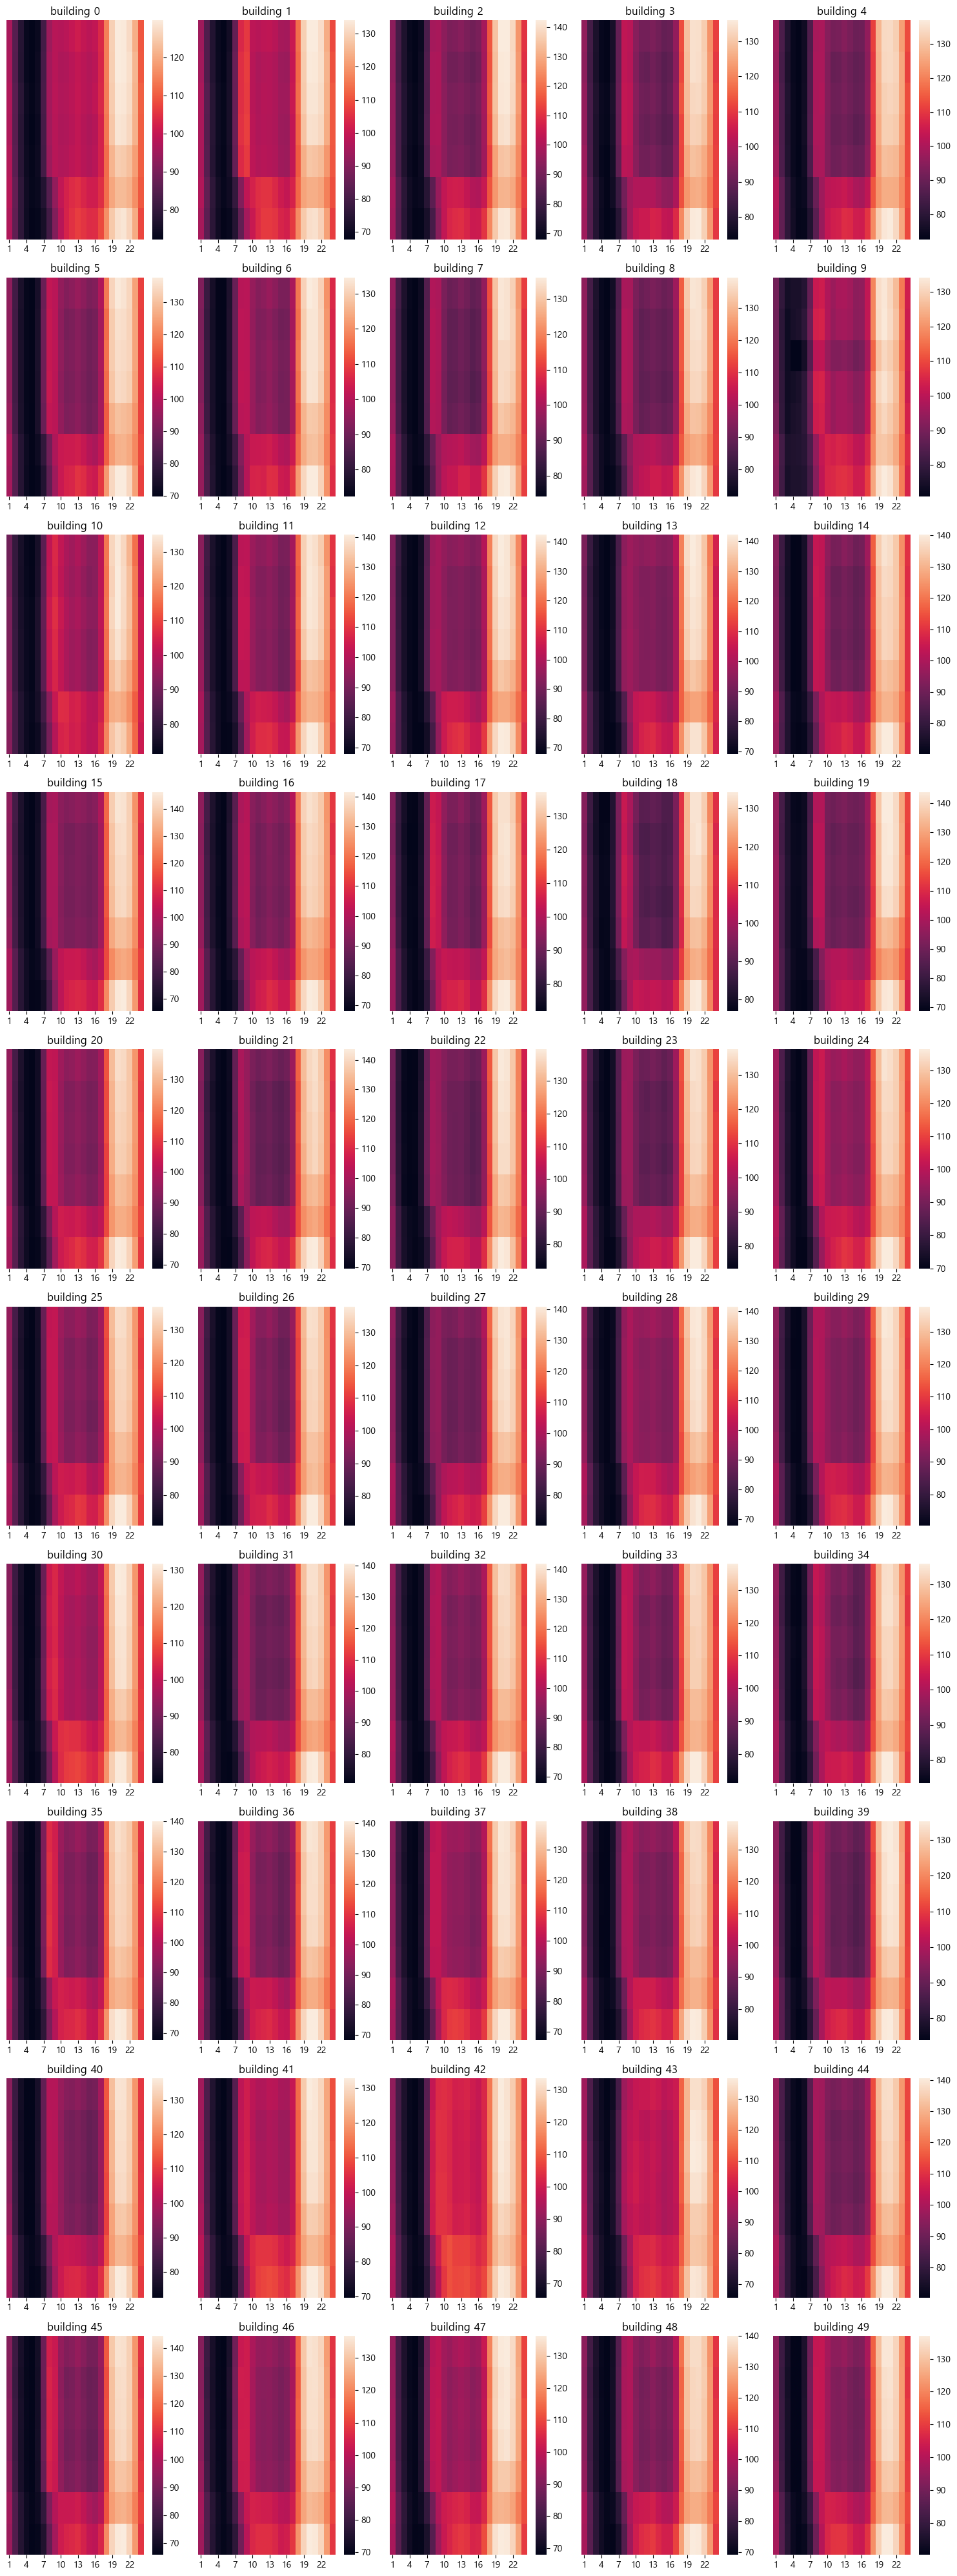

In [17]:
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for num in range(len(yes_2020[:50])):
    df = df_new[df_new['electric_train.num'] == yes_2020[num]]
    # 요일, 시간별 electric_train.elec
    df = df.groupby(['electric_train.weekday', 'electric_train.hh24'])['electric_train.elec'].mean().reset_index().pivot(index='electric_train.weekday', columns='electric_train.hh24', values='electric_train.elec')
    plt.subplot(10, 5, 1+num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

plt.tight_layout()
plt.show()

In [18]:
# 온도별 elec의 이상치 처리 
for idx in list(df_new.loc[df_new['electric_train.elec'] < 0, 'electric_train.nph_ta'].index):
    area_num = df_new.loc[idx]['electric_train.num']
    season = df_new.loc[idx]['season']
    year = df_new.loc[idx]['year']
    temp = df_new.loc[idx]['electric_train.nph_ta']
    df_new.loc[idx, 'electric_train.elec'] = \
        df_new.loc[(df_new.loc[idx]['electric_train.num'] == area_num) & (df_new.loc[idx]['year'] == year) & (df_new.loc[idx]['season'] == season) & (df_new['electric_train.nph_ta'] == temp), :]['electric_train.elec'].mean()
        # 해당 지역의 해당 연도의 해당 시즌의 해당 온도와 같은 날의 elec의 평균

In [19]:
# 풍속이 음수인 값을 갖는 이상치 처리

ano_list = list(df_new.loc[df_new['electric_train.nph_ws_10m'] < 0, 'electric_train.nph_ws_10m'].index)
for idx in ano_list:
    pre_idx = idx - 1
    nex_idx = idx + 1

    previous_value = df_new.loc[pre_idx, 'electric_train.nph_ws_10m']
    next_value = df_new.loc[nex_idx, 'electric_train.nph_ws_10m']
    mean_val = (previous_value + next_value) / 2
    df_new.loc[idx, 'electric_train.nph_ws_10m'] = mean_val

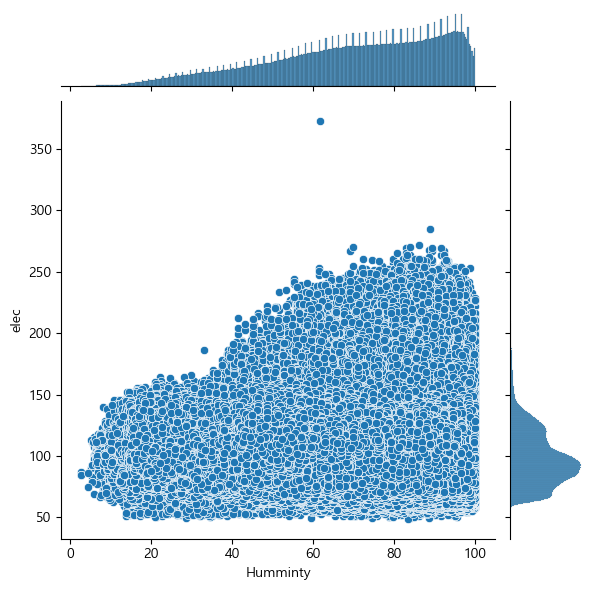

In [20]:
graph = sns.jointplot(x=df_new['electric_train.nph_hm'], y=df_new['electric_train.elec'], kind='scatter')
graph.set_axis_labels(xlabel='Humminty', ylabel='elec')
plt.show()

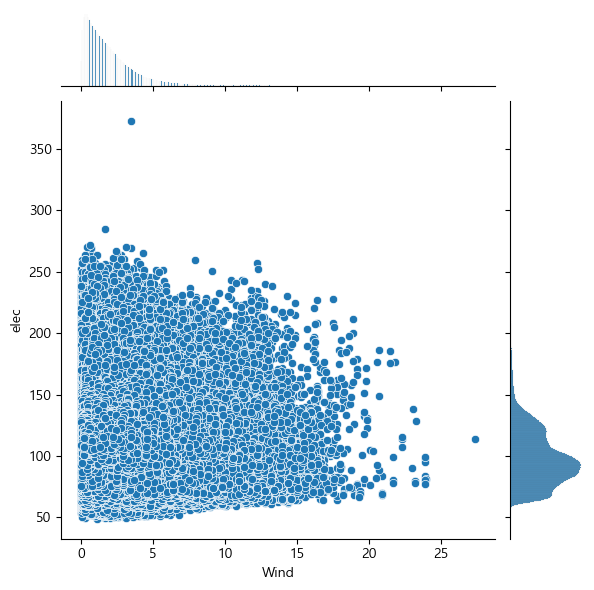

In [21]:
graph = sns.jointplot(x=df_new['electric_train.nph_ws_10m'], y=df_new['electric_train.elec'], kind='scatter')
graph.set_axis_labels(xlabel='Wind', ylabel='elec')
plt.show()

다음으로 trend residence 등 시계열 정보 확인 및 추가하기 